# Explore here

In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf



import warnings

df=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv")
df

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


In [19]:
df['date'] = pd.to_datetime(df['date'])
ts = df.set_index("date")

ts.head()

,sales
date,
2022-09-03 17:10:08.079328,55.292157
2022-09-04 17:10:08.079328,53.803211
2022-09-05 17:10:08.079328,58.141693
2022-09-06 17:10:08.079328,64.530899
2022-09-07 17:10:08.079328,66.013633


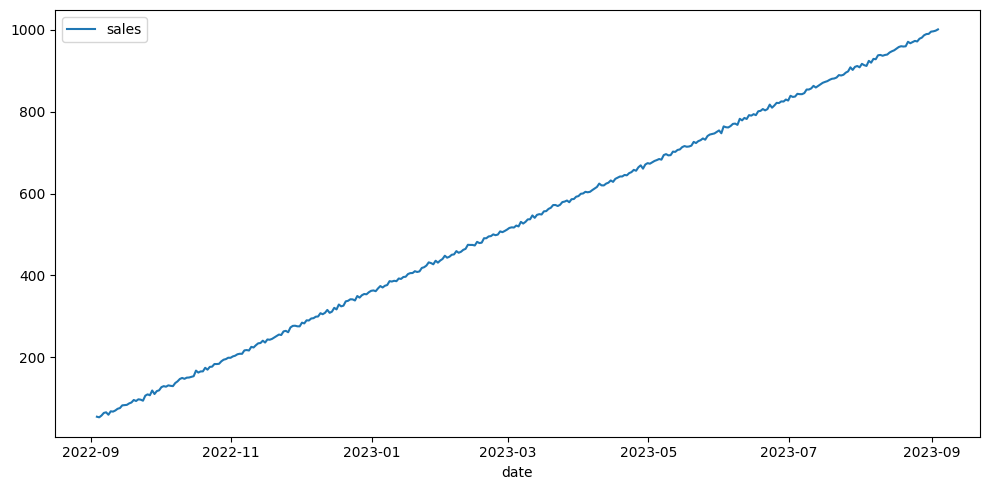

In [20]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)

plt.tight_layout()

plt.show()

el tensor en esta serie temporal es el dia

la tendencia es ascendente

In [21]:
decomposition = seasonal_decompose(ts, period = 30)
decomposition

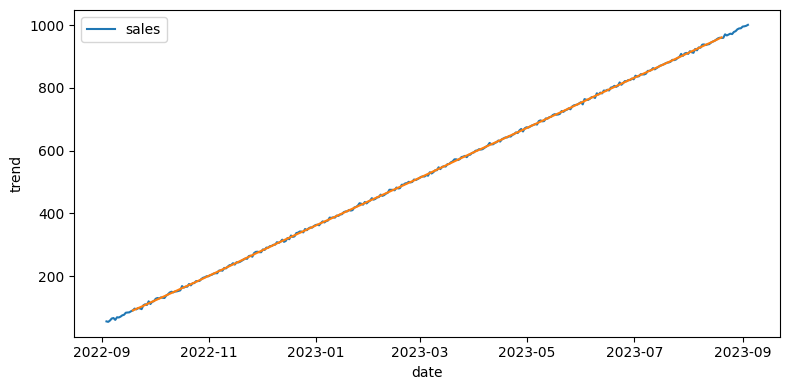

In [22]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = ts)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

se ve claramente la tendencia ascendente

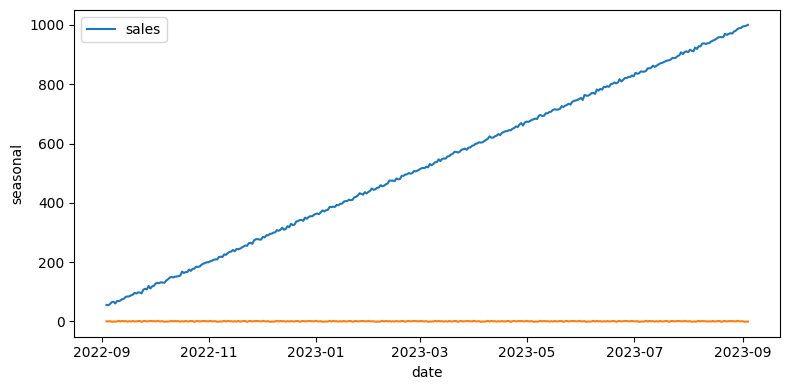

In [23]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = ts) 
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

In [24]:
def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

In [25]:

ts2= df.set_index("date")

# Diferenciar la serie para remover tendencia
ts2['diff_sales'] = ts2['sales'].diff().dropna()
ts_dif=ts2['diff_sales']

ts_dif.dropna(inplace = True)

ts_dif

date
2022-09-04 17:10:08.079328   -1.488946
2022-09-05 17:10:08.079328    4.338482
2022-09-06 17:10:08.079328    6.389205
2022-09-07 17:10:08.079328    1.482734
2022-09-08 17:10:08.079328   -5.931768
                                ...   
2023-08-30 17:10:08.079328    0.518681
2023-08-31 17:10:08.079328    5.386972
2023-09-01 17:10:08.079328    0.827090
2023-09-02 17:10:08.079328    1.535798
2023-09-03 17:10:08.079328    3.132571
Name: diff_sales, Length: 365, dtype: float64

In [26]:
# Test de Dickey-Fuller en la serie diferenciada
test_stationarity(ts_dif)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                -9.430263e+00
p-value                        5.212954e-16
#Lags Used                     1.200000e+01
Number of Observations Used    3.520000e+02
Critical Value (1%)           -3.449065e+00
Critical Value (5%)           -2.869786e+00
Critical Value (10%)          -2.571163e+00
dtype: float64

el p-value es menor a 0.05 por esto la serie diferenciada es estacionaria.

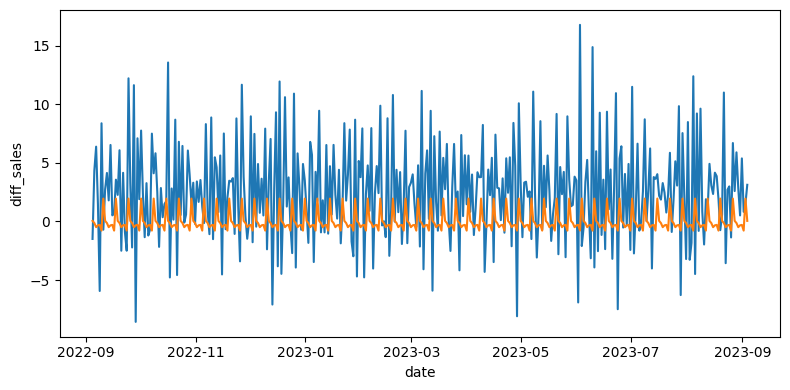

In [27]:
ts_dif_decomposition = seasonal_decompose(ts_dif)

ts_dif_seasonal = ts_dif_decomposition.seasonal

fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = ts_dif)
sns.lineplot(data = ts_dif_seasonal)

plt.tight_layout()

plt.show()

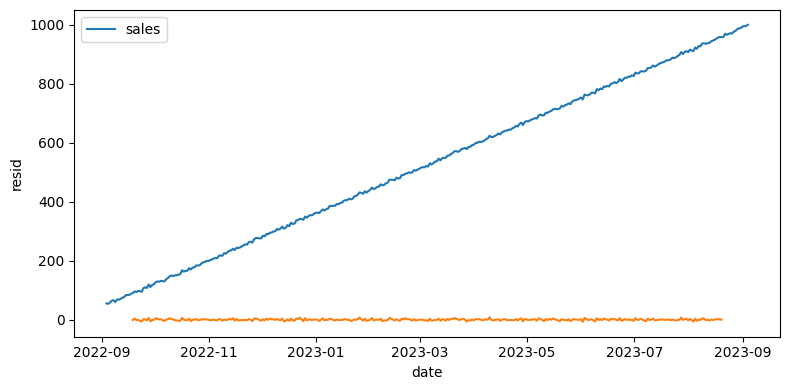

In [28]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = ts)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

descomposicion adecuada

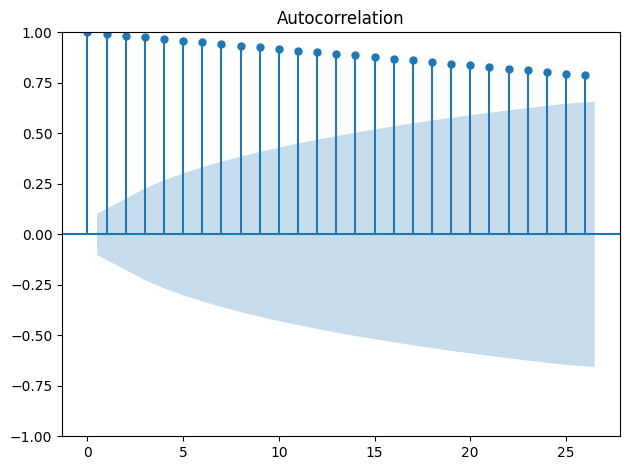

In [29]:
# por mes
plot_acf(ts)

plt.tight_layout()

plt.show()

In [30]:
import statsmodels.api as sm
print("Statsmodels funciona correctamente.")


Statsmodels funciona correctamente.


In [31]:

from pmdarima import auto_arima

model = auto_arima(ts, seasonal=True, trace=True, m=30)

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

Best model:  ARIMA(2,1,3)(0,0,1)[30] intercept

Total fit time: 365.725 seconds

#hecho en colab

In [32]:
model.summary()

NameError: name 'model' is not defined

In [33]:
forecast = model.predict(30)
forecast

NameError: name 'model' is not defined

NameError: name 'forecast' is not defined

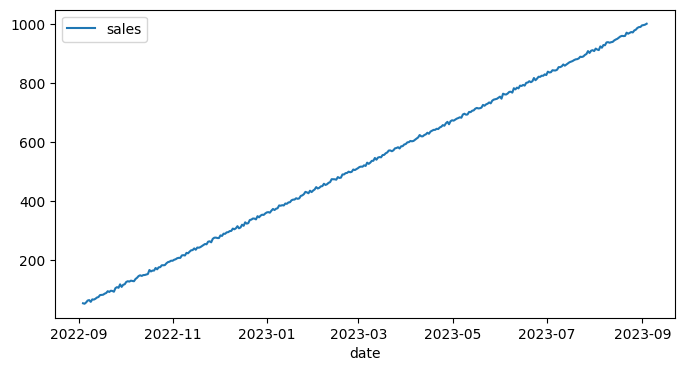

In [35]:
fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = ts)
sns.lineplot(data = forecast, c = "green")

plt.tight_layout()

plt.show()

NameError: name 'model' is not defined